In [2]:
#Exploring ridge regression

using Random
include("readclassjson.jl")
data = readclassjson("wildfire_data.json")
U = data["U"]
v = data["v"]
df = hcat(U, v)
df = df[shuffle(1:end), :]

U_train = df[1:414, 1:7]
v_train = df[1:414, 8]

U_eval = df[415:517, 1:7]
v_eval = df[415:517, 8]

103-element Vector{Float64}:
 1.0818051703517284
 0.0
 4.129228964075603
 0.0
 3.9193957597575593
 3.5655812377694427
 1.1019400787607843
 1.7263316639055997
 2.3427668826268775
 2.005525858729668
 0.0
 2.3942522815198695
 0.0
 ⋮
 3.311637304949512
 0.0
 4.08260930600368
 3.007166651179654
 1.2919836816486494
 1.2669476034873244
 1.8794650496471605
 0.0
 0.0
 0.0
 0.9001613499442714
 1.8213182714695995

In [3]:
import Statistics
using Statistics

U_train_mean = mean(U_train, dims=1)
U_train_std = std(U_train, dims=1)

U_eval_mean = mean(U_eval, dims=1)
U_eval_std = std(U_eval, dims=1)

U_train_s = (U_train .- U_train_mean) ./ U_train_std
U_eval_s = (U_eval .- U_train_mean) ./ U_train_std

U_train_s_mean = mean(U_train_s, dims=1)
U_train_s_std = std(U_train_s, dims=1)

U_eval_s_mean = mean(U_eval_s, dims=1)
U_eval_s_std = std(U_eval_s, dims=1)


println(U_train_mean)
println(U_train_s_mean)

println(U_train_std)
println(U_train_s_std)

println(U_eval_mean)
println(U_eval_std)

println(U_eval_s_mean)
println(U_eval_s_std)

[4.63768115942029 4.241545893719807 7.502415458937198 90.60966183574878 18.880193236714977 3.9533816425120767 0.024154589371980676]
[-9.868649107779169e-17 -1.6646641124059565e-16 1.690810669145317e-16 1.821912186334598e-15 -1.5580666118531786e-16 3.8938256805693896e-16 5.1019306868342035e-17]
[2.303619729763056 1.2329666684037812 2.225483914806644 5.771261638698873 5.7058310059642 1.7370414479829939 0.32787544919480904]
[0.9999999999999999 1.0 0.9999999999999999 0.9999999999999999 1.0 0.9999999999999999 1.0]
[4.796116504854369 4.533980582524272 7.368932038834951 90.78543689320388 18.9252427184466 4.275728155339807 0.011650485436893206]
[2.3612858880527523 1.1948872617308781 2.4773099391379523 4.388965838415972 6.224488615054377 1.9843735624070122 0.08778423958974797]
[0.06877669234512726 0.23717971969433338 -0.05997950343031061 0.030456955248130194 0.007895341044018987 0.1855721480923955 -0.03813674968892863]
[1.0250328461527927 0.969115623602217 1.113155625460087 0.7604863742419865 1

In [4]:
month_train = U_train[:, 3]
month_eval = U_eval[:, 3]

oh_train = zeros(414, 12)
for i in 1:414
    oh_train[i, Int(month_train[i])] = 1
end

oh_eval = zeros(103, 12)
for i in 1:103
    oh_eval[i, Int(month_eval[i])] = 1
end

U_train_oh = hcat(ones(414), U_train_s[:, 1:2], U_train_s[:, 4:7], oh_train)
U_eval_oh = hcat(ones(103), U_eval_s[:, 1:2], U_eval_s[:, 4:7], oh_eval)

print(U_train_oh[1, :])

[1.0, 1.4595806752035192, 1.4261976023704812, 0.5354701203510046, 1.405545792523835, -0.20343880851111176, -0.07367001534057858, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]

1.373022647464811
0.1
1.4000861368152637
0.1


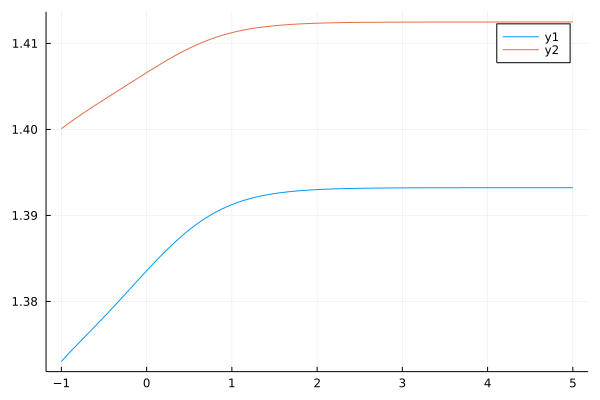

In [6]:
using LinearAlgebra
function ridgeregression(X,Y,l)
    n,d = size(X)
    m = size(Y,2)
    E = [zeros(d-1,1) I(d-1)]
    A = [X; sqrt(l*n)*E]
    B = [Y; zeros(d-1,m)]
    return A\B
end

function rms(y, yhat)
    return sqrt(sum((yhat .- y).^2) / size(y, 1))
end

lambdas_pow = range(-1, stop=5, length=100)
lambdas = 10 .^ lambdas_pow

train_losses = zeros(100)
eval_losses = zeros(100)

for i in 1:100
    theta = ridgeregression(U_train_oh, v_train, lambdas[i])
    train_losses[i] = rms(v_train, U_train_oh * theta)
    eval_losses[i] = rms(v_eval, U_eval_oh * theta)
end

println(minimum(train_losses))
println(lambdas[argmin(train_losses)])
println(minimum(eval_losses))
println(lambdas[argmin(eval_losses)])

using Plots
plot(lambdas_pow, train_losses)
plot!(lambdas_pow, eval_losses)

In [7]:
U_train_sin = hcat(ones(414), U_train_s[:, 1:2], U_train_s[:, 4:7], sin.(2*pi*month_train/12), cos.(2*pi*month_train/12))
U_eval_sin = hcat(ones(103), U_eval_s[:, 1:2], U_eval_s[:, 4:7], sin.(2*pi*month_eval/12), cos.(2*pi*month_eval/12))

print(U_train_sin[1, :])

[1.0, 1.4595806752035192, 1.4261976023704812, 0.5354701203510046, 1.405545792523835, -0.20343880851111176, -0.07367001534057858, -0.8660254037844385, -0.5000000000000004]

1.3788568366145522
0.1
1.3956047618439584
0.1


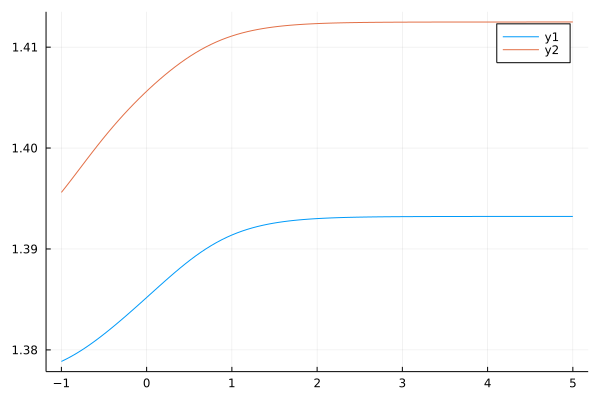

In [8]:
train_losses_sin = zeros(100)
eval_losses_sin = zeros(100)

for i in 1:100
    theta = ridgeregression(U_train_sin, v_train, lambdas[i])
    train_losses_sin[i] = rms(v_train, U_train_sin * theta)
    eval_losses_sin[i] = rms(v_eval, U_eval_sin * theta)
end

println(minimum(train_losses_sin))
println(lambdas[argmin(train_losses_sin)])
println(minimum(eval_losses_sin))
println(lambdas[argmin(eval_losses_sin)])

using Plots
plot(lambdas_pow, train_losses_sin)
plot!(lambdas_pow, eval_losses_sin)

In [180]:
y = randn(500)
X = ones(500)

theta_optimal_3a = sum(y)/100
theta_3a = X\y

println(theta_optimal_3a)
println(theta_3a)

#Theta is a scalar. X is a 500-element vector of 1s.

-0.0023733788014294243
-0.0004746757602858764


In [181]:
#The optimal theta is 0.
total = 0
for i in 1:500
    total += (theta_optimal_3a - y[i])^2
end

#L(theta) represents the variance of y.
print(total / 500)

0.9902860065668354